<a href="https://colab.research.google.com/github/hhemesat/MAT-421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this module, we will derive methods of approximating the derivative of a function f over a numerical grid and determine their accuracy

Let us consider the function f(x) = -cos(x) and compute the derivative numerically. In this example we use forward difference, which estimates the slope of the function at some xi using a line that connects f at xi with f at xi+1. We also print the maximum error, which is the largest difference between the numerical derivative and the exact solution.

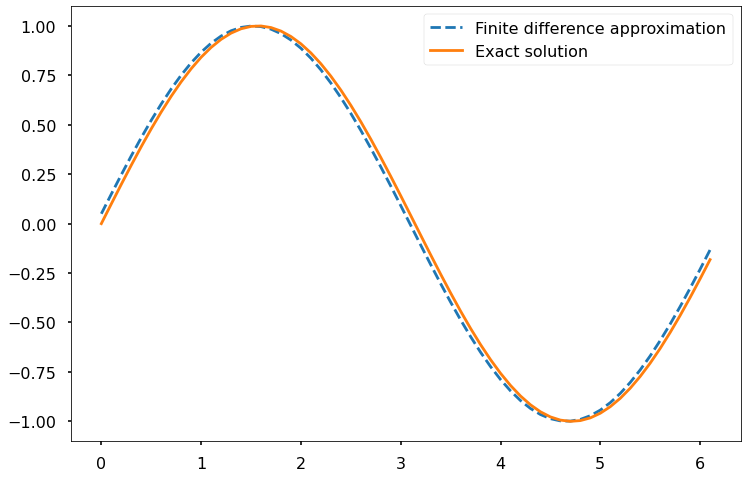

0.049984407218554114


In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline
step = 0.1
x = np.arange(0, 2*np.pi, step) 
y = -(np.cos(x))
forward_diff = np.diff(y)/step 
x_diff = x[:-1:] 
exact_solution = np.sin(x_diff) #since the derivative of -cos(x) = sin(x)
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

The maximum error = 0.0499, which is relatively small, and so the numerical derivative is a reasonably accurate estimate.

Again using the function f(x) = -cos(x) and forward differentiation, we use decreasing step sizes and calculating the subsequent maximum error to demonstrate the effect of the size of the step on the accuracy of the numerical integration. 

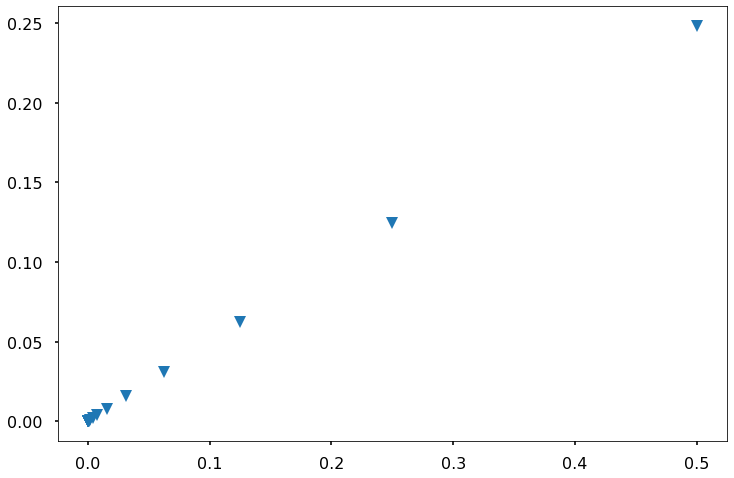

In [11]:
step = 1
iterations = 20 
step_size = [] 
max_error = [] 
for i in range(iterations):
    step /= 2 
    step_size.append(step) 
    x = np.arange(0, 2 * np.pi, step) 
    y = -(np.cos(x))
    forward_diff = np.diff(y)/step 
    x_diff = x[:-1] 
    exact_solution = np.sin(x_diff) 
    max_error.append(\
            max(abs(exact_solution - forward_diff)))
plt.figure(figsize = (12, 8))
plt.plot(step_size, max_error, 'v')
plt.show()

The plot above shows a large jump in the accuracy as the size of step increases, showing the importance of having a small enough step size for numerical derivative

Let us demonstrate the effect of noice on functions by considering the function f(x) = -cos(x) and corrupting it with a very small sine wave such that fe,w(x) = -cos(x)+esin(wx), where e = 0.005 and w = 200

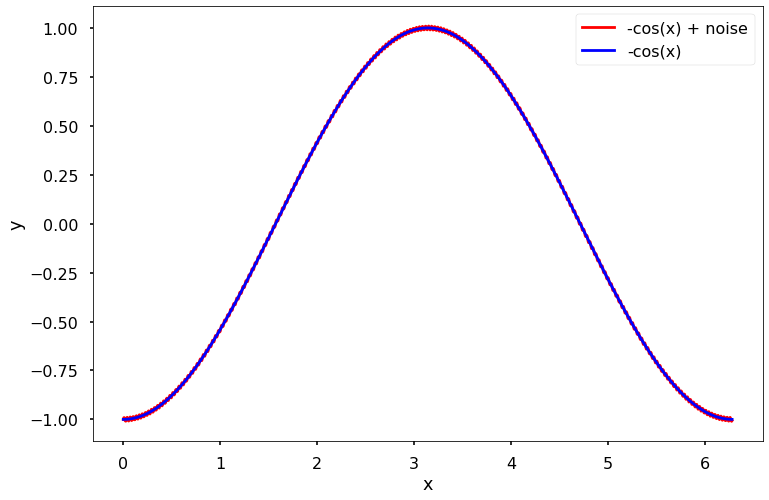

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline
x = np.arange(0, 2*np.pi, 0.005) 
omega = 200
epsilon = 0.01
y = -np.cos(x) 
y_noise = y + epsilon*np.sin(omega*x)
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = '-cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = '-cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Since the derivative of -cos(x) is sin(x) and the derivative of esin(wx) = ewcos(wx), we can examine the contribution of the noise to the derivative

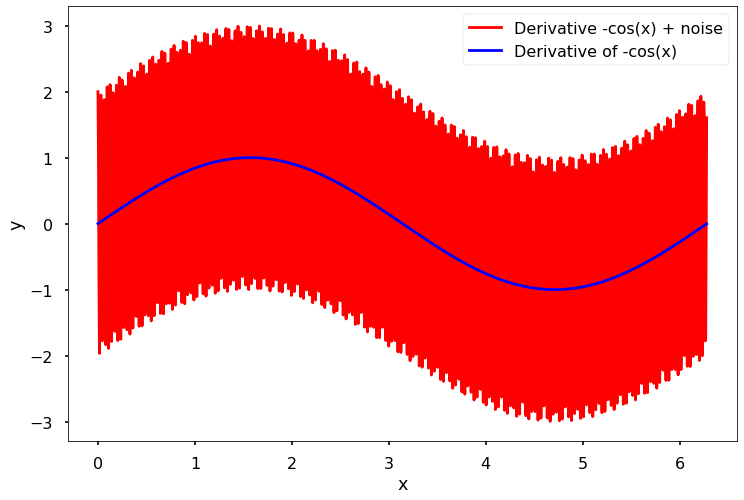

In [15]:
x = np.arange(0, 2*np.pi, 0.005) 
y = np.sin(x) 
y_noise = y + epsilon*omega*np.cos(omega*x)
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative -cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of -cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

This graph demonstrates a lot of noise due to the sin(x) function, making the derivative unusable.